In [3]:
import tkinter as tk
from tkinter import ttk, messagebox
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Global variable for text entry count
text_entry_count = 0

# Load data (replace with your data loading method)
data = pd.read_csv("dataset1.csv")

# Define a list of negation words
negation_words = set(["not", "no", "never", "n't"])

# Text preprocessing function with negation handling
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    words = text.split()
    new_words = []
    negation = False
    
    for word in words:
        if negation:
            word = word + "_NEG"
        if word in negation_words:
            negation = True
        else:
            negation = False
        new_words.append(word)
    
    return " ".join(new_words)

# Preprocess text data
data['text'] = data['text'].apply(preprocess_text)

# Train-Test Split for Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['reviews'], test_size=0.2, random_state=42)

# Train vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectorizer.fit(X_train)

# Train model
model = LogisticRegression(solver="lbfgs", multi_class="multinomial")
model.fit(vectorizer.transform(X_train), y_train)

# Function to classify sentiment
def classify_sentiment(text_to_classify):
    text_to_classify = preprocess_text(text_to_classify)
    features = vectorizer.transform([text_to_classify])
    prediction = model.predict(features)[0]
    return prediction

# Function to display emojis based on sentiment
def display_emojis(sentiment):
    positive_emojis = ["😊", "😄", "😍", "🥰", "😎", "😇", "😉"]
    negative_emojis = ["😔", "😞", "😢", "😭"]
    return positive_emojis if sentiment == "positive" else negative_emojis

# Function to add a new text entry field
def add_text_entry():
    global text_entry_count  # Declare text_entry_count as global

    # Add new label for the text entry
    new_text_label = ttk.Label(scrollable_frame, text="Enter a review:")
    new_text_label.grid(row=text_entry_count * 2 + 2, column=0, padx=5, pady=5, sticky="w")

    # Add new text entry field
    new_text_entry = tk.Text(scrollable_frame, height=5, width=50)
    new_text_entry.grid(row=text_entry_count * 2 + 2, column=1, padx=5, pady=5)
    text_entry_list.append(new_text_entry)

    # Create labels for displaying review results, emojis, and feedback dynamically
    result_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12, "bold"))
    result_label.grid(row=text_entry_count * 2 + 2, column=2, pady=5, padx=10, sticky="w")
    result_labels.append(result_label)

    emoji_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 20))
    emoji_label.grid(row=text_entry_count * 2 + 2, column=3, pady=5, padx=10, sticky="w")
    emoji_labels.append(emoji_label)

    feedback_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12))
    feedback_label.grid(row=text_entry_count * 2 + 2, column=4, pady=5, padx=10, sticky="w")
    feedback_labels.append(feedback_label)

    # Add classify and add review buttons below the new entry
    classify_button = ttk.Button(scrollable_frame, text="Classify Review", command=classify_reviews)
    classify_button.grid(row=text_entry_count * 2 + 3, column=0, pady=10, columnspan=2)

    add_entry_button = ttk.Button(scrollable_frame, text="Add Review", command=add_text_entry)
    add_entry_button.grid(row=text_entry_count * 2 + 3, column=2, pady=10, columnspan=3)

    text_entry_count += 1

# Function to classify reviews and display results
def classify_reviews():
    for idx, entry in enumerate(text_entry_list):
        text = entry.get("1.0", "end-1c")
        if text:
            # Classify sentiment
            sentiment = classify_sentiment(text)
            result_labels[idx].config(text="Predicted sentiment: " + sentiment)
            # Display emojis based on sentiment
            emojis = display_emojis(sentiment)
            emoji_labels[idx].config(text=" ".join(emojis))
            # Provide feedback based on sentiment
            feedback_text = "We're happy to hear you love it. 😊" if sentiment == "positive" else "We apologize that we didn't \n meet your expectations. 😔"
            feedback_color = "green" if sentiment == "positive" else "red"
            feedback_labels[idx].config(text=feedback_text, foreground=feedback_color)
        else:
            result_labels[idx].config(text="Please enter a review.")
            messagebox.showwarning("Empty Review", "Please enter a review.")

root = tk.Tk()
root.title("Review Classification")

# Center the window on the screen
root.update_idletasks()
width = root.winfo_width()
height = root.winfo_height()
x = (root.winfo_screenwidth() // 2) - (width // 2)
y = (root.winfo_screenheight() // 2) - (height // 2)
root.geometry('{}x{}+{}+{}'.format(width, height, x, y))

# # Create themed style for the GUI
# style = ttk.Style()
# style.theme_use("clam")  # Choose a theme (you can try different themes like "clam", "alt", "default", etc.)
# style.configure(".", font=("Comic Sans MS", 12), foreground="#333")  # Set font and foreground color for all widgets
# style.configure("TButton", padding=10, background="#ff6b81", foreground="#fff")  # Button style
# style.map("TButton", background=[("active", "#ff4757")])  # Button hover color
# style.configure("TLabel", padding=10, background="#fff8e7")  # Label style
# style.configure("TFrame", background="#fff8e7")  # Frame style
# Create themed style for the GUI
style = ttk.Style()
style.theme_use("clam")  # Choose a theme (you can try different themes like "clam", "alt", "default", etc.)
style.configure(".", font=("Comic Sans MS", 12), foreground="#333")  # Set font and foreground color for all widgets
style.configure("TButton", padding=10, background="#ff6b81", foreground="#fff")  # Button style
style.map("TButton", background=[("active", "#ff4757")])  # Button hover color
style.configure("TLabel", padding=10, background="#fff8e7")  # Label style
style.configure("TFrame", background="#fff8e7")  # Frame style


# Create a main frame and canvas for scrolling
main_frame = ttk.Frame(root)
main_frame.pack(fill=tk.BOTH, expand=True, padx=20, pady=20)

canvas = tk.Canvas(main_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

scrollbar = ttk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

scrollable_frame = ttk.Frame(canvas)
canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

# Create and place widgets
text_entry_list = []

# Labels and text entry fields for the first review
text_label = ttk.Label(scrollable_frame, text="Enter a review:")
text_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")

text_entry = tk.Text(scrollable_frame, height=5, width=50)
text_entry.grid(row=0, column=1, padx=5, pady=5)
text_entry_list.append(text_entry)

# Create labels for displaying review results, emojis, and feedback
result_labels = []
emoji_labels = []
feedback_labels = []

# Initialize the first set of labels
result_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12, "bold"))
result_label.grid(row=0, column=2, pady=5, padx=10, sticky="w")
result_labels.append(result_label)

emoji_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 20))
emoji_label.grid(row=0, column=3, pady=5, padx=10, sticky="w")
emoji_labels.append(emoji_label)

feedback_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12))
feedback_label.grid(row=0, column=4, pady=5, padx=10, sticky="w")
feedback_labels.append(feedback_label)

# Buttons for classifying the review and adding new review entry
classify_button = ttk.Button(scrollable_frame, text="Classify Review", command=classify_reviews)
classify_button.grid(row=1, column=0, pady=10, columnspan=2)

add_entry_button = ttk.Button(scrollable_frame, text="Add Review", command=add_text_entry)
add_entry_button.grid(row=1, column=2, pady=10, columnspan=3)

root.mainloop()


In [36]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data (replace with your data loading method)
data = pd.read_csv("dataset1.csv")

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

# Preprocess text data
data['text'] = data['text'].apply(preprocess_text)

# Train-Test Split for Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['reviews'], test_size=0.2, random_state=42)

# Train vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectorizer.fit(X_train)

# Train model
model = LogisticRegression(solver="lbfgs", multi_class="multinomial")
model.fit(vectorizer.transform(X_train), y_train)

# Evaluate model on test data
y_pred = model.predict(vectorizer.transform(X_test))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Evaluation Metrics:
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.75


In [25]:
data

,title,product,rating,text,rew_body,reviews,text_length
0,Powertron 72200 3.5 VOLT BATTERY FOR WELCH ALL...,Electronics,1,"While the battery arrived in a timely manner, ...",-0.4404,negative,175
1,AmazonBasics Ultra Thin Indoor HDTV Antenna,Electronics,4,Does a good job of pulling in 30+ channels. S...,0.8310,positive,469
2,Clip Plus 4 GB MP3 Player (Black),Electronics,5,The Sansa Clip + is just awesome. It has a re...,0.8553,positive,174
3,Bose UFS-20 Universal Floor Stands (pair),Electronics,5,Quality stands.,0.0000,neutral,15
4,Sony MDRZX100 Headphones,Electronics,3,"These were very good headphones for a while, b...",0.4848,positive,250
...,...,...,...,...,...,...,...
2090,"SweetLeaf SteviaTabs Sweetener, 100 Tabs",Grocery,3,Container is hard to open and close.,-0.1027,negative,36
2091,Garbanzo Beans,Grocery,5,HUMMUS!!!!!,0.0000,neutral,11
2092,SpressoLuxe Nespresso Compatible Gourmet Coffe...,Grocery,1,Smashed by the machine with each use. Coffee ...,0.4404,positive,95
2093,"Slap Ya Mama Cajun Seasoning Blend, Original, s",Grocery,5,Add a little or add a lot -- add it to almost ...,0.7840,positive,142


In [26]:
data.isna().sum()

title          0
product        0
rating         0
text           0
rew_body       0
reviews        0
text_length    0
dtype: int64

In [27]:
data.describe()

,rating,rew_body,text_length
count,2095.000000,2095.000000,2095.000000
mean,4.104057,0.516129,301.310740
std,1.349823,0.491432,445.017362
min,1.000000,-0.963700,2.000000
25%,4.000000,0.300650,86.000000
50%,5.000000,0.690800,167.000000
75%,5.000000,0.890000,358.500000
max,5.000000,0.999700,6176.000000


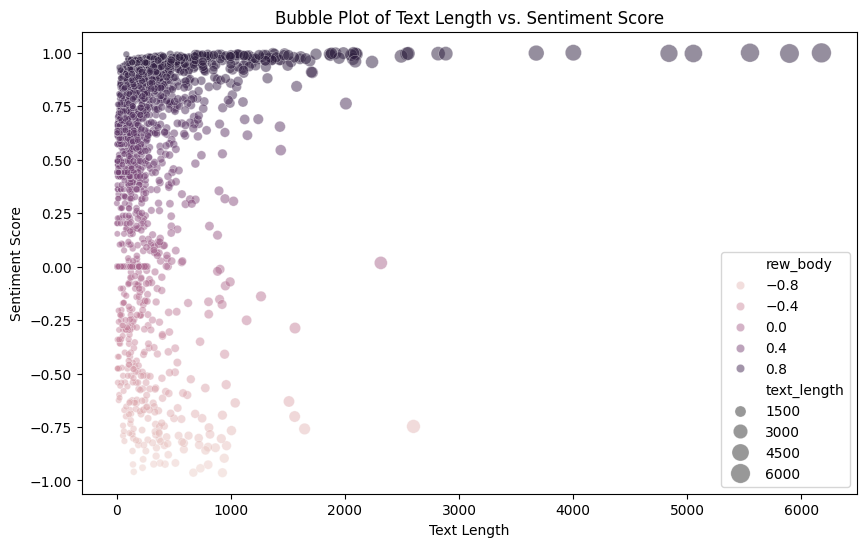

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("dataset1.csv")

# Calculate text length and add it to the DataFrame
data['text_length'] = data['text'].apply(len)

# Bubble Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='rew_body', hue='rew_body', size='text_length', data=data, sizes=(20, 200), alpha=0.5)
plt.title('Bubble Plot of Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()

